# **EDA**

In [1]:
import pandas as pd
import numpy as np

In [37]:
test_csv = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Test\\test.csv")

In [38]:
test_csv.columns, len(test_csv.columns)

(Index(['climbRate', 'Sgz', ''p'', ''q'', 'curPitch', 'curRoll', 'absRoll',
        'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
        'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
        'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
        'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
        'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
        'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
        'diffSeTime13', 'diffSeTime14', 'alpha', 'Se'],
       dtype='object'),
 40)

# **EDA-Training Data**

In [4]:
csv_1 = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Train\\1.csv")
csv_2 = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Train\\2.csv")
csv_3 = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Train\\3.csv")
csv_4 = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Train\\4.csv")
csv_5 = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Train\\5.csv")

In [5]:
def intersection(lst1, lst2):
   return [value for value in lst1 if value in lst2]

In [6]:
intersection(csv_1.columns, csv_2.columns)

[]

In [7]:
intersection(csv_2.columns, csv_3.columns)

[]

In [8]:
intersection(csv_3.columns, csv_4.columns)

[]

In [9]:
intersection(csv_4.columns, csv_5.columns)

[]

In [10]:
df = pd.concat([csv_1, csv_2, csv_3, csv_4, csv_5], axis=1)
df.head()

,climbRate,Sgz,'p','q',curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56.0,-0.33,-0.09,0.90,0.2,-11,12.0,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39.0,0.02,0.12,0.39,-0.6,-12,8.0,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4.0,0.14,0.14,0.78,0.4,-11,-9.0,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5.0,-0.12,0.11,1.06,0.6,-10,-7.0,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21.0,-0.17,0.07,1.33,-0.6,-11,0.0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12212 non-null  int64  
 1   Sgz           12210 non-null  float64
 2   'p'           12211 non-null  float64
 3   'q'           12210 non-null  float64
 4   curPitch      12210 non-null  float64
 5   curRoll       12212 non-null  float64
 6   absRoll       12212 non-null  int64  
 7   diffClb       12204 non-null  float64
 8   diffRollRate  12209 non-null  float64
 9   diffDiffClb   12211 non-null  float64
 10  SeTime1       12210 non-null  float64
 11  SeTime2       12212 non-null  float64
 12  SeTime3       12210 non-null  float64
 13  SeTime4       12208 non-null  float64
 14  SeTime5       12210 non-null  float64
 15  SeTime6       12209 non-null  float64
 16  SeTime7       12212 non-null  float64
 17  SeTime8       12212 non-null  float64
 18  SeTime9       12212 non-nu

In [12]:
df.isna().sum()

climbRate       0
Sgz             2
'p'             1
'q'             2
curPitch        2
curRoll         0
absRoll         0
diffClb         8
diffRollRate    3
diffDiffClb     1
SeTime1         2
SeTime2         0
SeTime3         2
SeTime4         4
SeTime5         2
SeTime6         3
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     2
diffSeTime2     5
diffSeTime3     2
diffSeTime4     5
diffSeTime5     3
diffSeTime6     1
diffSeTime7     3
diffSeTime8     3
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

<AxesSubplot: >

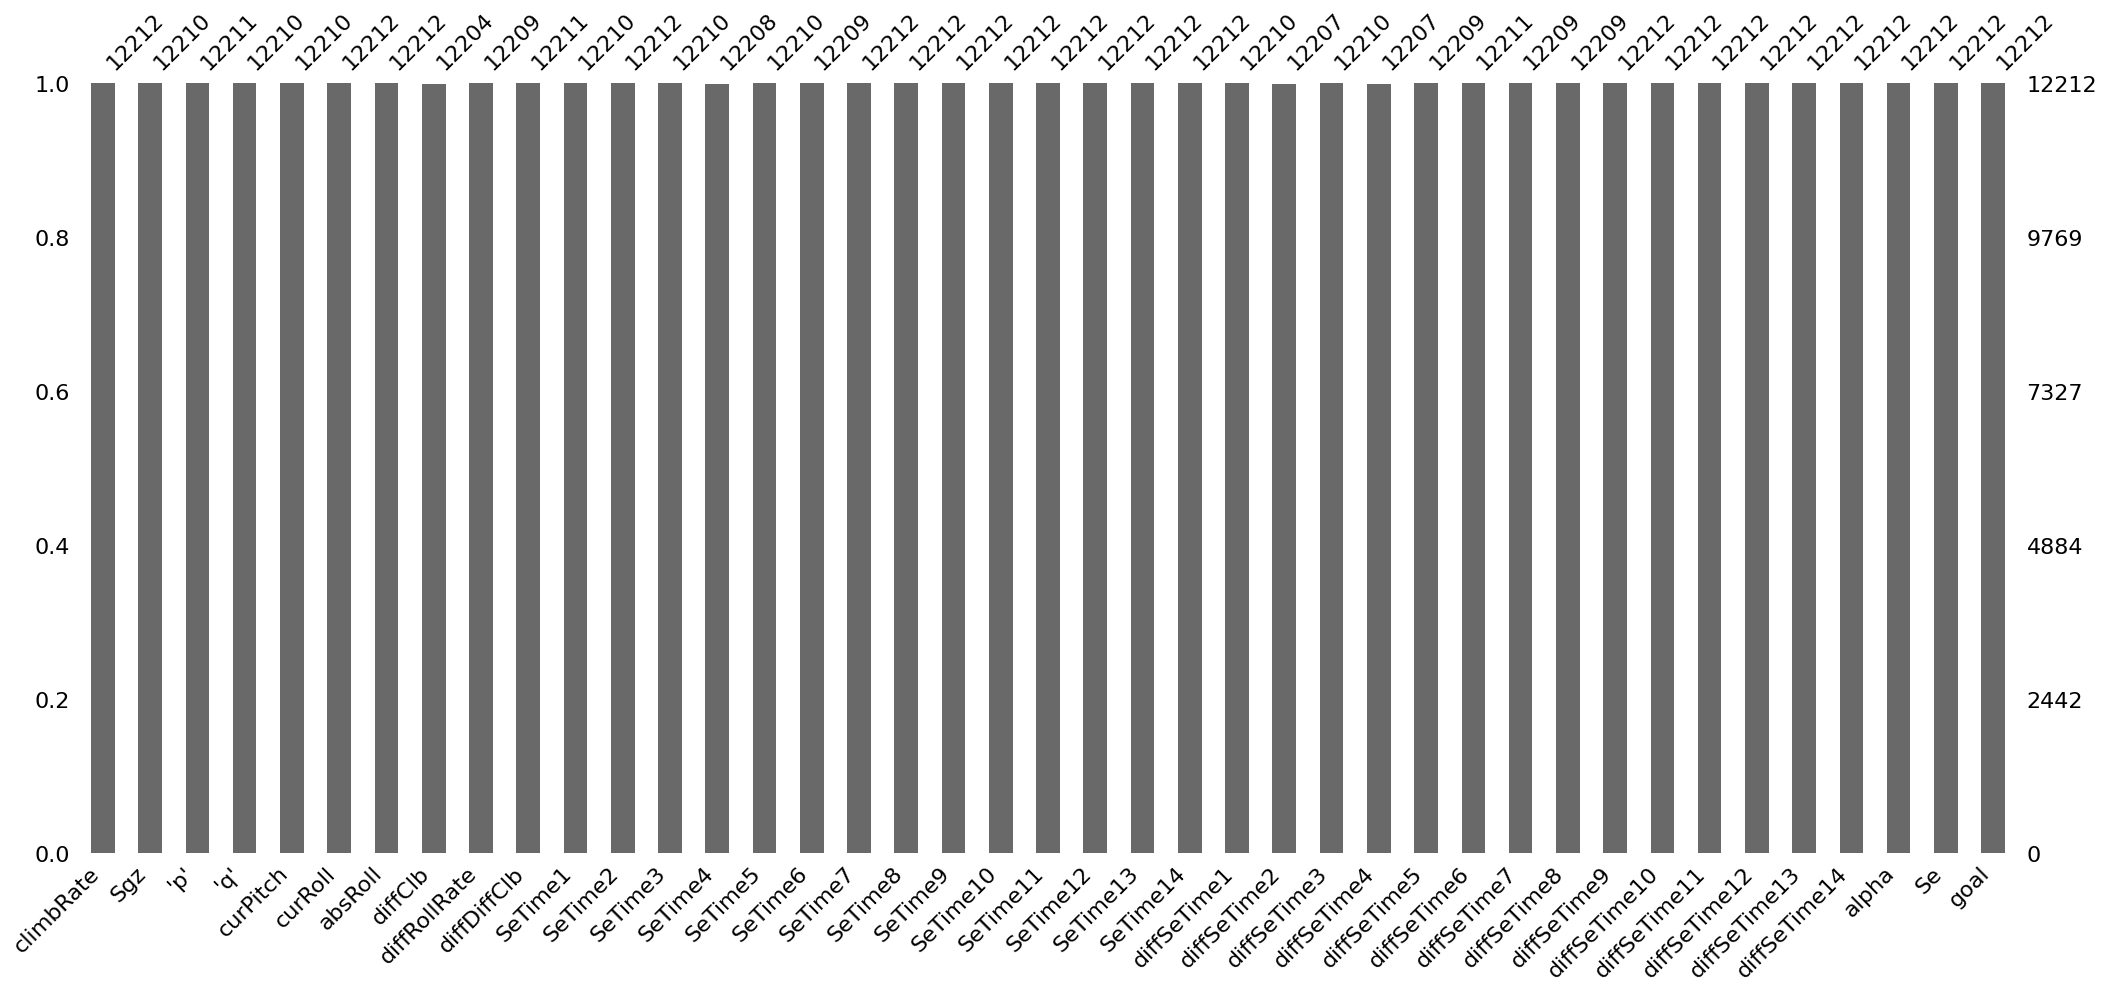

In [13]:
import missingno as msno

msno.bar(df)

<AxesSubplot: >

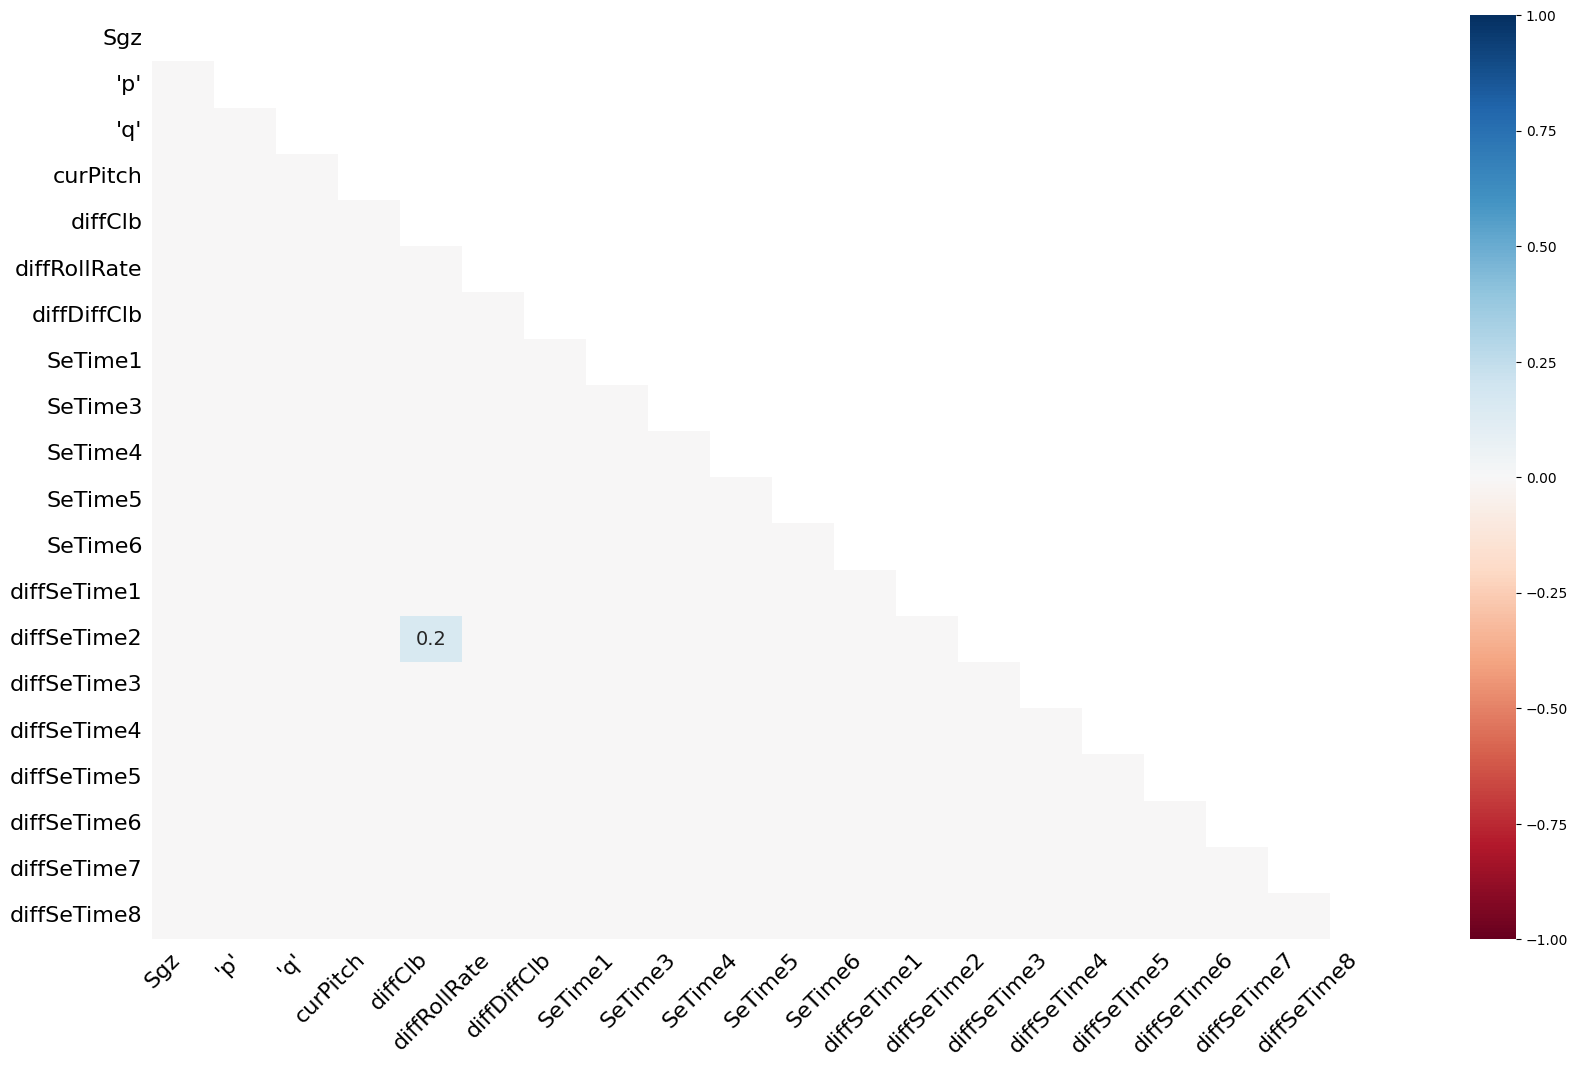

In [14]:
msno.heatmap(df)

In [15]:
null_cols = []
for col in df.columns:
    if df[col].isna().sum() > 0:
        null_cols.append(col)

df = df.dropna(subset=null_cols)

In [16]:
df.shape

(12157, 41)

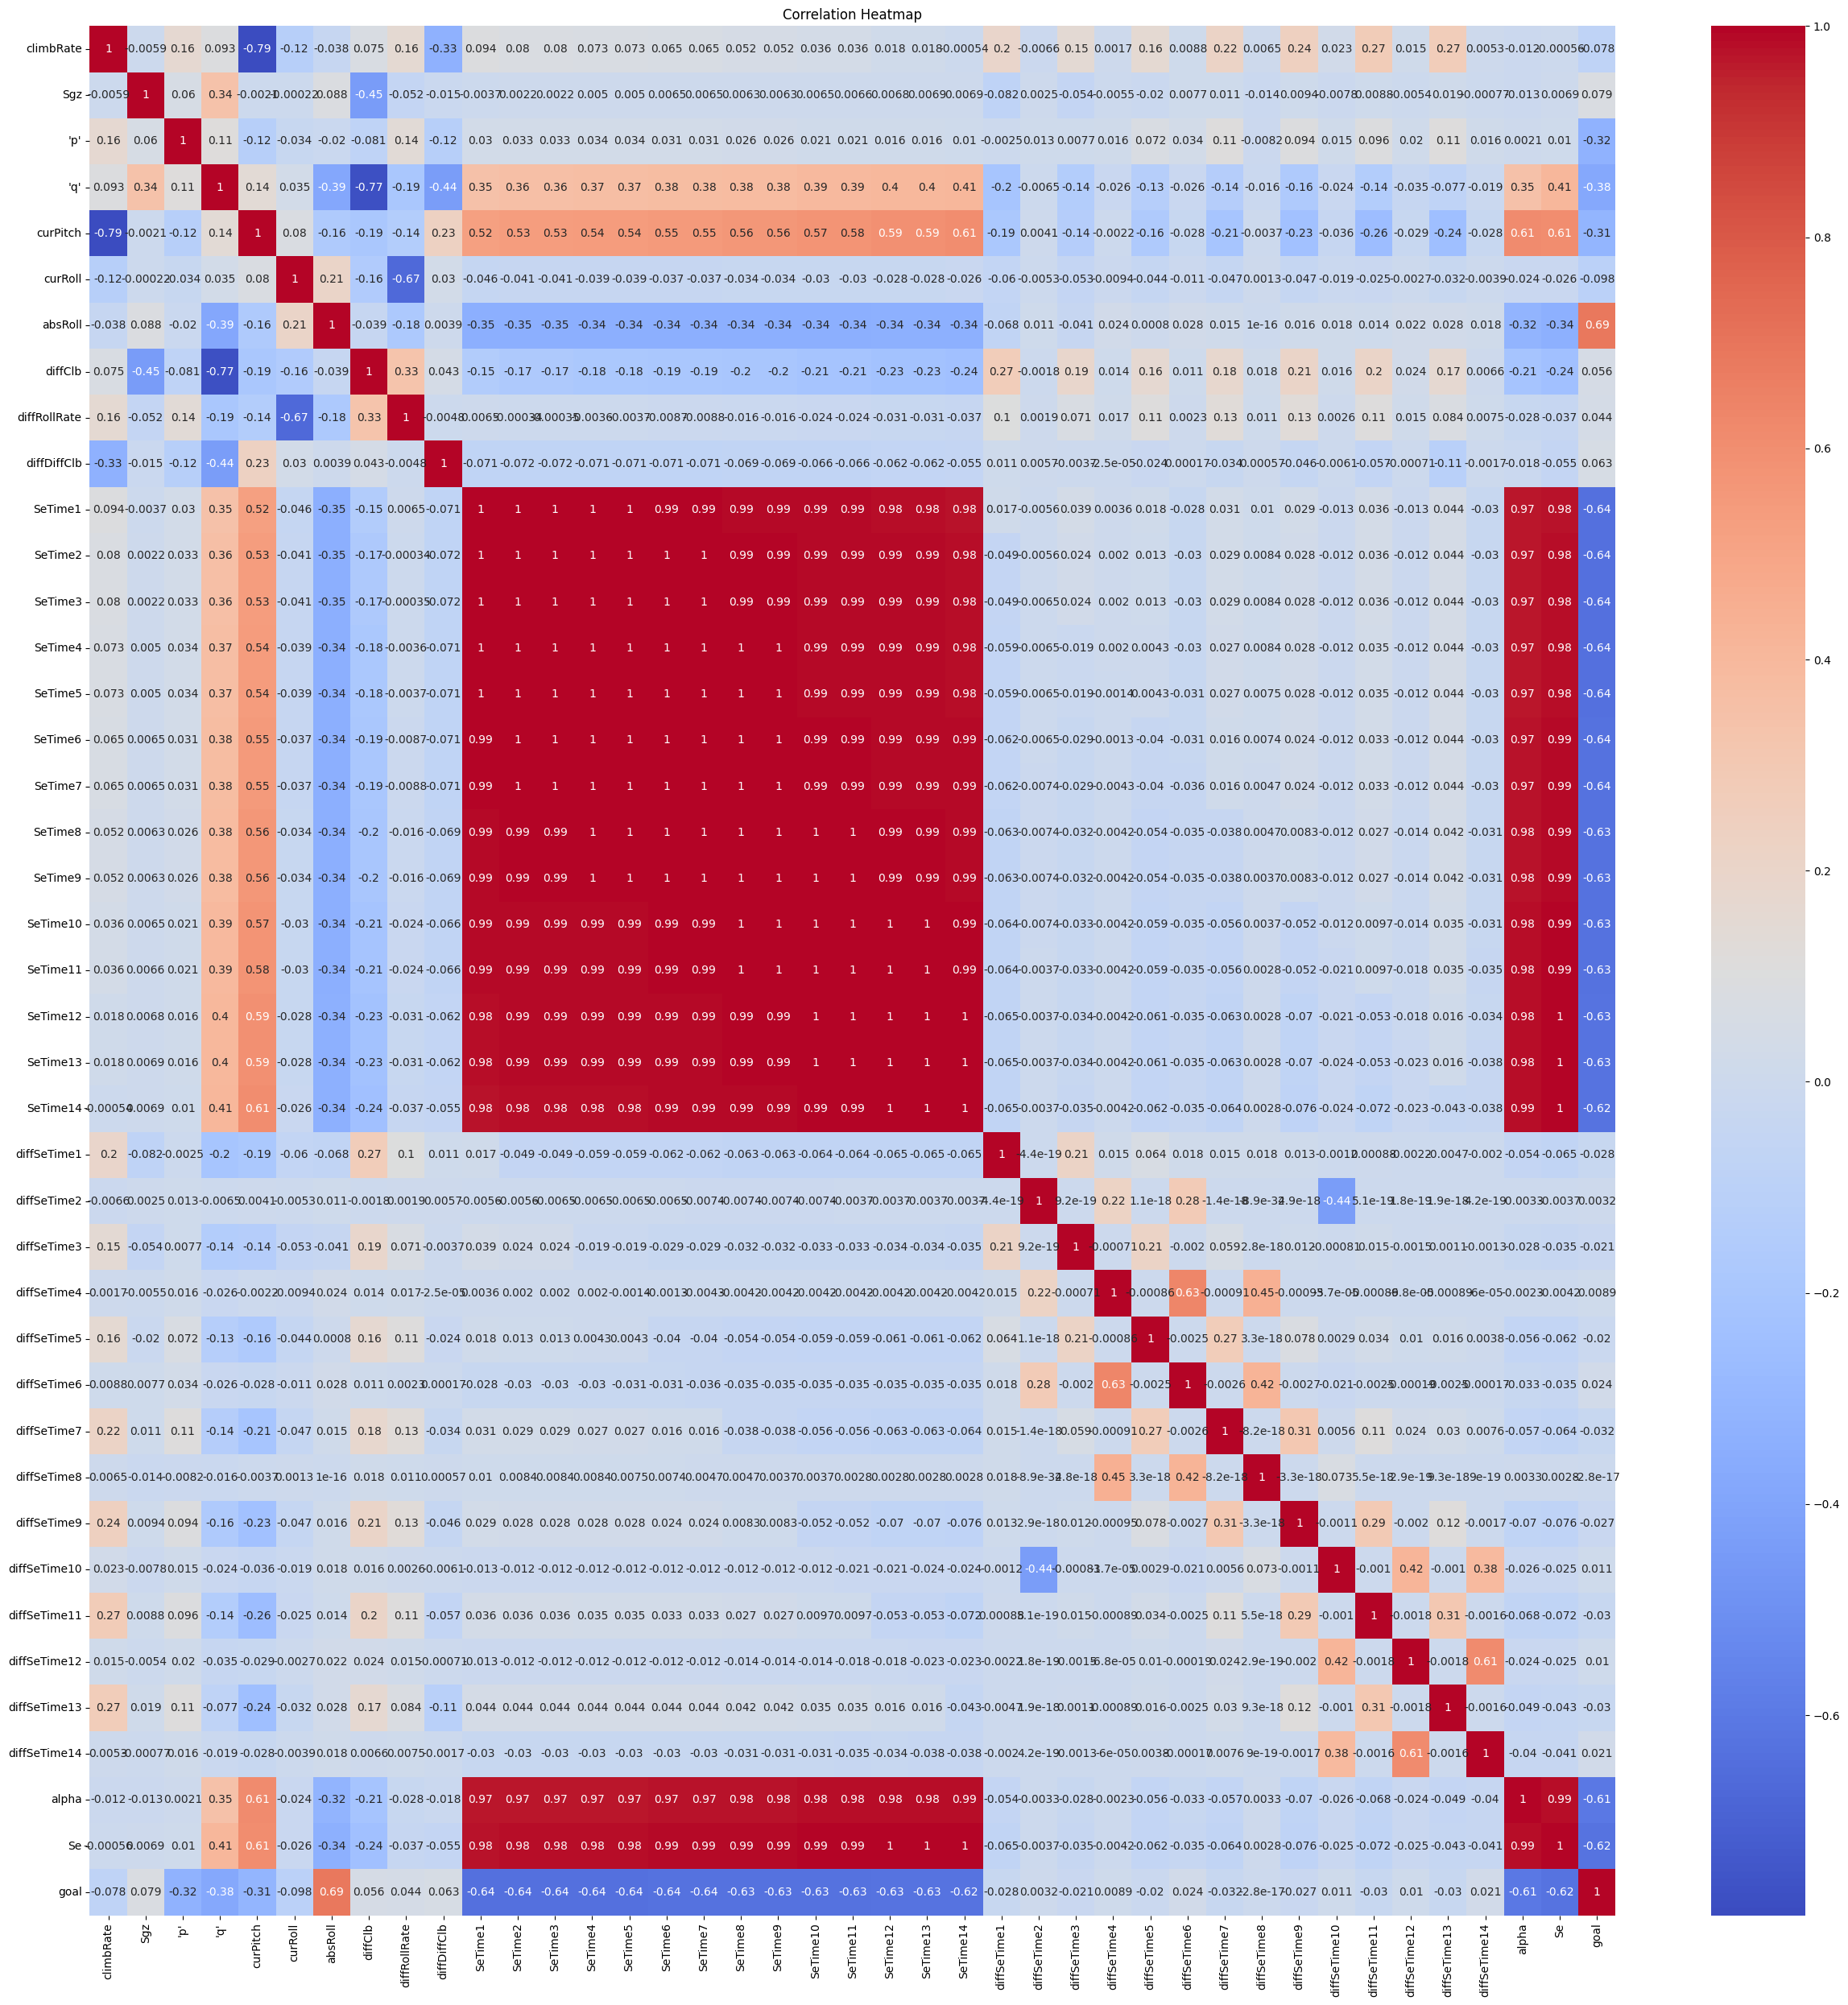

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap='coolwarm',  annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [18]:
# Set the threshold for correlation
threshold = 0.9

# Find highly correlated columns

highly_correlated_cols = set()
cols = correlation_matrix.columns

for i in range(len(cols)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)

# Drop highly correlated columns
df = df.drop(columns=highly_correlated_cols)
            
# len(highly_correlated_cols)

In [19]:
len(df.columns)

26

In [20]:
# c=1
# plt.figure(figsize=(12, 10))

# for i in df.columns:
#     ax = plt.subplot(5, 6, c)
#     c += 1
#     sns.boxplot(data = df, y=i)

In [21]:
# def outliers(val):

#     if val>(q3+threshold):
#         return q3
#     elif val<(q1-threshold):
#         return q1

#     return val

# for i in df.columns[3:]:

#     q3 = df[i].describe()['75%']
#     q1 = df[i].describe()['25%']

#     iqr = q3-q1
#     threshold = iqr*1.5
#     df[i] = df[i].apply(outliers)

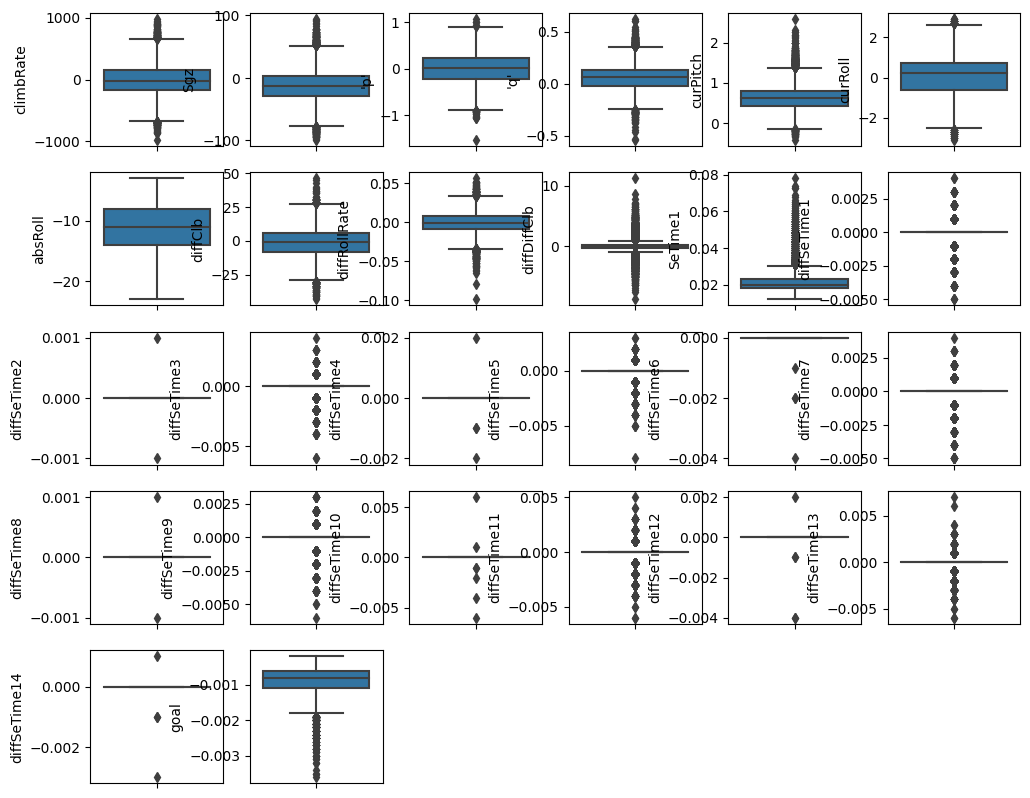

In [22]:
c=1
plt.figure(figsize=(12, 10))

for i in df.columns:
    ax = plt.subplot(5, 6, c)
    c += 1
    sns.boxplot(data = df, y=i)

In [23]:
from pycaret.regression import *
clf = setup(df, target='goal')
best = compare_models()

,Description,Value
0,Session id,7450
1,Target,goal
2,Target type,Regression
3,Original data shape,"(12157, 26)"
4,Transformed data shape,"(12157, 26)"
5,Transformed train set shape,"(8509, 26)"
6,Transformed test set shape,"(3648, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0001,0.0000,0.0002,0.8403,0.0002,0.1415,0.1050
gbr,Gradient Boosting Regressor,0.0001,0.0000,0.0002,0.8349,0.0002,0.1485,0.1420
et,Extra Trees Regressor,0.0001,0.0000,0.0002,0.8324,0.0002,0.1466,0.2510
rf,Random Forest Regressor,0.0001,0.0000,0.0002,0.8292,0.0002,0.1478,0.4980
br,Bayesian Ridge,0.0001,0.0000,0.0002,0.8124,0.0002,0.1631,0.0140
lr,Linear Regression,0.0001,0.0000,0.0002,0.8102,0.0002,0.1636,0.4690
ridge,Ridge Regression,0.0001,0.0000,0.0002,0.8060,0.0002,0.1647,0.0140
lar,Least Angle Regression,0.0001,0.0000,0.0002,0.7894,0.0002,0.1732,0.0120
huber,Huber Regressor,0.0001,0.0000,0.0002,0.7076,0.0002,0.1780,0.0980
ada,AdaBoost Regressor,0.0002,0.0000,0.0002,0.6730,0.0002,0.2829,0.1130


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [24]:
import dabl

fc = dabl.SimpleRegressor(random_state=0)
X = df.drop("goal", axis=1)
y = df['goal']

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Assuming X and y are your data and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fc.fit(X_train, y_train)

Running DummyRegressor()
r2: -0.001 neg_mean_squared_error: -0.000
=== new best DummyRegressor() (using r2):
r2: -0.001 neg_mean_squared_error: -0.000

Running DecisionTreeRegressor(max_depth=1, random_state=0)
r2: 0.337 neg_mean_squared_error: -0.000
=== new best DecisionTreeRegressor(max_depth=1, random_state=0) (using r2):
r2: 0.337 neg_mean_squared_error: -0.000

Running DecisionTreeRegressor(max_leaf_nodes=8, random_state=0)
r2: 0.620 neg_mean_squared_error: -0.000
=== new best DecisionTreeRegressor(max_leaf_nodes=8, random_state=0) (using r2):
r2: 0.620 neg_mean_squared_error: -0.000

Running DecisionTreeRegressor(max_leaf_nodes=16, random_state=0)
r2: 0.678 neg_mean_squared_error: -0.000
=== new best DecisionTreeRegressor(max_leaf_nodes=16, random_state=0) (using r2):
r2: 0.678 neg_mean_squared_error: -0.000

Running DecisionTreeRegressor(max_leaf_nodes=32, random_state=0)
r2: 0.720 neg_mean_squared_error: -0.000
=== new best DecisionTreeRegressor(max_leaf_nodes=32, random_state

SimpleRegressor(random_state=0)

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rfr_p = rfr.predict(X_test)
r2_score(rfr_p, y_test), mean_squared_error(rfr_p, y_test), mean_absolute_error(rfr_p, y_test)

(0.794956865581567, 2.584344430738305e-08, 0.00011565995065789474)

In [80]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(n_estimators=500, random_state=1)
reg2 = RandomForestRegressor(n_estimators=500, random_state=1)
reg3 = LinearRegression()
reg4 = XGBRegressor(n_estimators=500)
reg5 = ExtraTreesRegressor(n_estimators=300)
# reg6 = Ridge(alpha=1.0)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3), ('etr', reg5)])
ereg_l = ereg.fit(X_train, y_train)

ereg_p = ereg_l.predict(X_test)
r2_score(ereg_p, y_test), mean_squared_error(ereg_p, y_test), mean_absolute_error(ereg_p, y_test)

(0.8103944751754153, 2.4223567715300868e-08, 0.00011288636475897737)

In [68]:
reg = GradientBoostingRegressor(n_estimators=500, random_state=1)

sreg = reg.fit(X_train, y_train)

sreg_p = sreg.predict(X_test)
r2_score(sreg_p, y_test), mean_squared_error(sreg_p, y_test), mean_absolute_error(sreg_p, y_test)

(0.8125526228000884, 2.537698980671155e-08, 0.00011521913997686333)

In [26]:
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

etr_p = etr.predict(X_test)
r2_score(etr_p, y_test), mean_squared_error(etr_p, y_test), mean_absolute_error(etr_p, y_test)

(0.7965985482902503, 2.5692903645833343e-08, 0.00011579043311403512)

In [53]:
import lightgbm as lgb

lll = lgb.LGBMRegressor(n_estimators=650, learning_rate=0.1)
lll.fit(X_train, y_train)

lll_p = lll.predict(X_test)
r2_score(lll_p, y_test), mean_squared_error(lll_p, y_test), mean_absolute_error(lll_p, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1367
[LightGBM] [Info] Number of data points in the train set: 9725, number of used features: 18
[LightGBM] [Info] Start training from score -0.000876


(0.8209040463997428, 2.461273640275841e-08, 0.00011197211049844704)

In [75]:
def preprocess(data, scaler, highly_correlated_cols):
  missing_values = (data.isna().sum())[data.isna().sum() != 0]
  data.dropna(subset=missing_values.index, inplace=True)

  # Set the threshold for correlation
  # threshold = 0.9

  # Find highly correlated columns

  # highly_correlated_cols = set()
  # correlation_matrix = data.corr()
  # cols = correlation_matrix.columns

  # for i in range(len(cols)):
  #     for j in range(i):
  #         if correlation_matrix.iloc[i, j] >= threshold:
  #             colname = correlation_matrix.columns[i]
  #             highly_correlated_cols.add(colname)

  # # Drop highly correlated columns
  data.drop(columns=highly_correlated_cols, inplace=True)

  X = data
  X = scaler.transform(X)

  return X


test_csv = pd.read_csv("Raiders Of Lost Data\Raiders Of Lost Data\Test\\test.csv")


X_pain = preprocess(test_csv, scaler, highly_correlated_cols)
pain_pred = ereg_l.predict(X_pain)

pain_df = pd.DataFrame(pain_pred, columns=['goal'])
pain_df.to_csv('pain7.csv', index=False)